#                                ****** OCR Text Recognition ******

In [1]:
# Importing necessary libraries 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract


"""Pytesseract is installable using Python package manager tool pip by running <b> pip install pytesseract </b> in your favorite shell"""


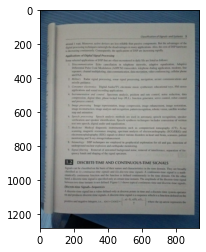

In [2]:
# Reading the original image and plotting

image = cv2.imread("sample_img.jpeg")
plt.imshow(image)

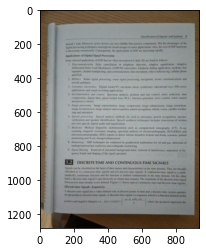

In [3]:
# Matplotlib shows image as RGB while OpenCV reads as BGR
# Convert img from BGR to RGB

#Converting BGR to RGB
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)


In [4]:
# Selecting Region of Interest

r=cv2.selectROI(img)
cropped=image[int(r[1]):int(r[1]+r[3]),int(r[0]):int(r[0]+r[2])]
cv2.imshow("cropped img",cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()

""" NOTE : Region of Interest are taken by the user and 
the unwanted parts in the image will be cropped.

JUST CLICK ON THE IMAGE , DRAG IT AND SELECT YOUR REGION OF INTEREST 
AND THEN PRESS ENTER """

# Selected Region of interest is obtained in cropped img. 

' NOTE : Region of Interest are taken by the user and \nthe unwanted parts in the image will be cropped.\n\nJUST CLICK ON THE IMAGE , DRAG IT AND SELECT YOUR REGION OF INTEREST \nAND THEN PRESS ENTER '

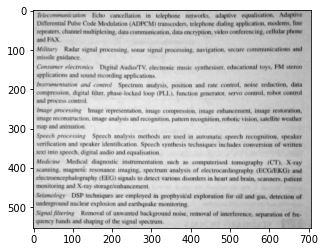

In [5]:
# Getting grayscale image

img_gray = cv2.cvtColor(cropped,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap = "gray")

In [6]:
# Displaying the Grayscale_Filter cropped image on a new window.

cv2.imshow("Grayscale_Filter",img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

# A new window will pop out 
# Press any key to continue running next shells.

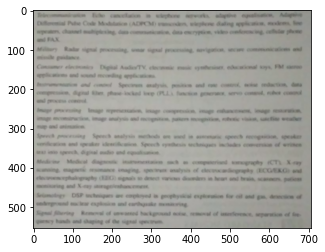

In [7]:
## Noise removal --> blurring

remove_noise = cv2.medianBlur(cropped , 5)
plt.imshow(remove_noise)


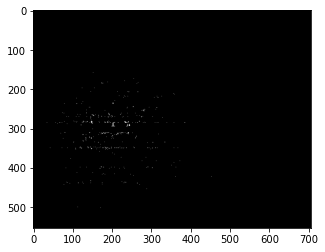

In [8]:
# Thresholding images --> setting all foreground pixels  deskew(image):   

_ ,threshold_img = cv2.threshold(img_gray, 180,230 ,cv2.THRESH_BINARY)
plt.imshow(threshold_img , cmap = "gray")

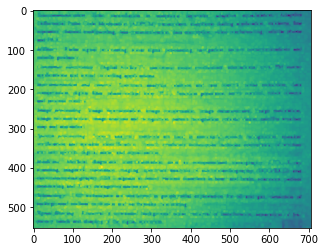

In [9]:
# Dilation --> adds pixels to the boundaries of objects in an image.

kernel = np.ones((5,5),np.uint8)
dilate_img = cv2.dilate(img_gray , kernel , iterations = 1)
plt.imshow(dilate_img)


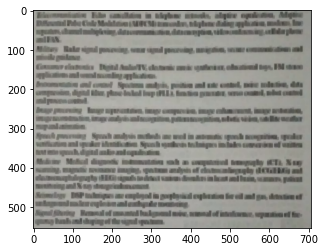

In [10]:
# Erosion --> discarding pixels near boundary.

kernel = np.ones((5,5),np.uint8)
erode_img = cv2.erode(cropped, kernel, iterations = 1)
plt.imshow(erode_img)

In [11]:
# Displaying Eroded Image on a new window

cv2.imshow("Erosion",erode_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

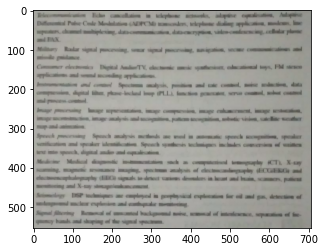

In [12]:
# Opening --> erosion followed by dilation.

kernel = np.ones((5,5),np.uint8)
opening_img = cv2.morphologyEx(cropped, cv2.MORPH_OPEN, kernel)
plt.imshow(opening_img)

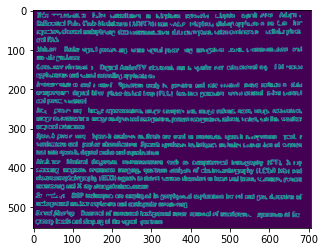

In [13]:
# Canny Edge detection of images

canny_img = cv2.Canny(cropped, 100, 200)
plt.imshow(canny_img)

In [14]:
# Getting boxes around text

height, width, ch = cropped.shape
boxes = pytesseract.image_to_boxes(cropped) 

for box in boxes.splitlines():
    box = box.split(' ')
    detect_text = cv2.rectangle(cropped, (int(box[1]), height - int(box[2])), (int(box[3]), height - int(box[4])), (0, 255, 255), 2)
    


In [15]:
# TEXT DETECTION
# Displaying Images with boxes around the text

cv2.imshow('text detected in img', detect_text)
cv2.waitKey(0)
cv2.destroyAllWindows()


"""NOTE"""
# A new window named"text detected in img" will pop out. Press any key to close that window 

'NOTE'

In [16]:
# Converting images to text

text = pytesseract.image_to_string(img_gray)
print("IMAGE TO TEXT \n")
print(text)




IMAGE TO TEXT 

 

Telecommunication Echo cancellation in telephone networks, adaptive equalisation, Adaptive
Differential Pulse Code Modulation (ADPCM) transcoders, telephone dialing pplication, modems, line
repeaters, channel multiplexing, data communication, data eneryption, video conferencing, cellular phone
and FAX.

Military Radar signal processing, sonar signal processing, navigation, secure communications and
missile guidance

Consumer electronics Digital Audio/TV, electronic music synthesiser, educational toys, FM stereo
applications and sound recording applications.

Instrumentation and control Spectrum analysis, position and rate control, noise reduction, data
compression, digital filter, phase-locked loop (PLL), function generator, servo control, robot contral
and process control

Image processing \mage representaon, image compression, image enhancement, image restoration,
image reconstruction, image analysts and recognition, pattern recognition, robotic vision, satellite w

The above texts are detected from the given input image . 
____________________________________________________________________
